# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularization loss.

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
0.01896541960606335


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [5]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447646e-11
W1 max relative error: 4.090896e-09
b1 max relative error: 2.738421e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.02.

Final training loss:  0.017143643532923757


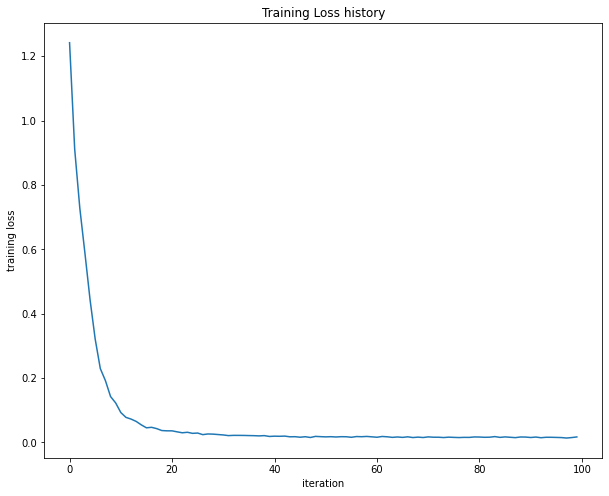

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [7]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [8]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 2.302762
iteration 100 / 1000: loss 2.302358
iteration 200 / 1000: loss 2.297404
iteration 300 / 1000: loss 2.258897
iteration 400 / 1000: loss 2.202975
iteration 500 / 1000: loss 2.116816
iteration 600 / 1000: loss 2.049789
iteration 700 / 1000: loss 1.985711
iteration 800 / 1000: loss 2.003726
iteration 900 / 1000: loss 1.948076
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

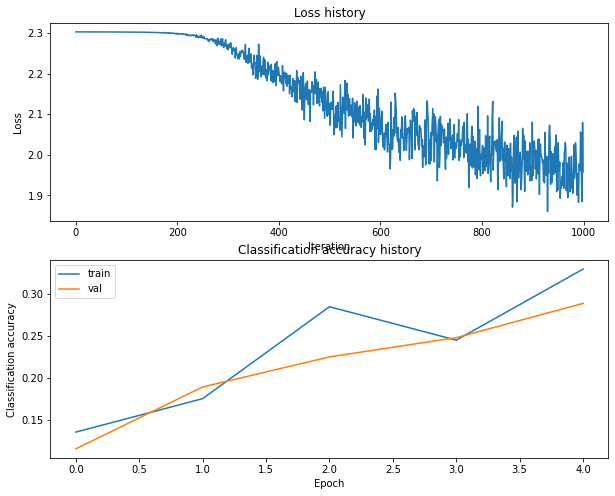

In [9]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

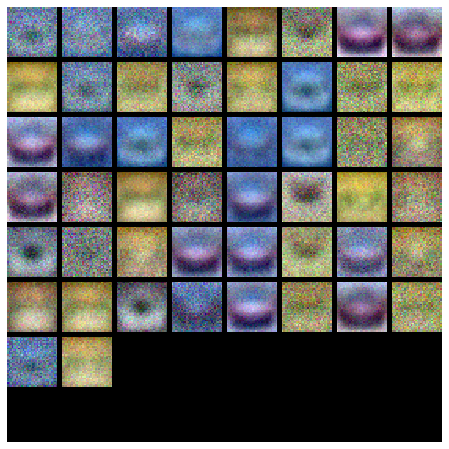

In [10]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$

In [12]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

results = {}
best_val = -1   # The highest validation accuracy that we have seen so far.

################################################################################
# TODO:                                                                        #
# Write code that chooses the best hyperparameters by tuning on the validation #
# set. For each combination of hyperparameters, train a linear SVM on the      #
# training set, compute its accuracy on the training and validation sets, and  #
# store these numbers in the results dictionary. In addition, store the best   #
# validation accuracy in best_val and the LinearSVM object that achieves this  #
# accuracy in best_svm.                                                        #
#                                                                              #
# Hint: You should use a small value for num_iters as you develop your         #
# validation code so that the SVMs don't take much time to train; once you are #
# confident that your validation code works, you should rerun the validation   #
# code with a larger value for num_iters.                                      #
################################################################################

# Provided as a reference. You may or may not want to change these hyperparameters

# Hyper parameters to tune
learning_rates = [1e-6, 1e-7, 5e-5, 1e-6]
regularization_strengths = [1e-1, 1e-2, 1e-3, 1e-4]
hidden_size = [120, 240, 360]
batch_size = [100, 200, 300]

input_size = 32 * 32 * 3
num_classes = 10

best_val = 0
best_svm = None
for hs in hidden_size:
    net = TwoLayerNet(input_size, hs, num_classes)
    for lr in learning_rates:
        for reg in regularization_strengths:
            for bz in batch_size:
                # Train the network
                stats = net.train(X_train, y_train, X_val, y_val,
                            num_iters=2000, batch_size=bz,
                            learning_rate=lr, learning_rate_decay=0.95,
                            reg=reg, verbose=True)

                y_train_pred = net.predict(X_train)
                train_accuracy = np.mean(y_train == y_train_pred)
                y_val_pred   = net.predict(X_val)
                val_accuracy = np.mean(y_val == y_val_pred)
                results[(lr, reg, hs, bz)] = (train_accuracy, val_accuracy)

                if (val_accuracy > best_val):
                    best_val = val_accuracy
                    best_net = net

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# for lr, reg, bs, hs in sorted(results):
#     train_accuracy, val_accuracy = results[(lr, reg, bs, hs)]
#     print 'lr %e reg %e bs %e hs %e train accuracy: %f val accuracy: %f' % (
#                 lr, reg, bs, hs, train_accuracy, val_accuracy)

# Print out results.
for lr, reg, hs, bz in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg, hs, bz)]
    print('lr %e reg %e hs %e bz %e train accuracy: %f val accuracy: %f' % (
                lr, reg, hs, bz, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


iteration 0 / 2000: loss 2.302750
iteration 100 / 2000: loss 2.302765
iteration 200 / 2000: loss 2.302762
iteration 300 / 2000: loss 2.302747
iteration 400 / 2000: loss 2.302740
iteration 500 / 2000: loss 2.302759
iteration 600 / 2000: loss 2.302758
iteration 700 / 2000: loss 2.302759
iteration 800 / 2000: loss 2.302710
iteration 900 / 2000: loss 2.302741
iteration 1000 / 2000: loss 2.302699
iteration 1100 / 2000: loss 2.302713
iteration 1200 / 2000: loss 2.302673
iteration 1300 / 2000: loss 2.302688
iteration 1400 / 2000: loss 2.302656
iteration 1500 / 2000: loss 2.302704
iteration 1600 / 2000: loss 2.302668
iteration 1700 / 2000: loss 2.302707
iteration 1800 / 2000: loss 2.302670
iteration 1900 / 2000: loss 2.302686
iteration 0 / 2000: loss 2.302635
iteration 100 / 2000: loss 2.302695
iteration 200 / 2000: loss 2.302621
iteration 300 / 2000: loss 2.302646
iteration 400 / 2000: loss 2.302679
iteration 500 / 2000: loss 2.302625
iteration 600 / 2000: loss 2.302607
iteration 700 / 2000: 

iteration 600 / 2000: loss 2.288638
iteration 700 / 2000: loss 2.289565
iteration 800 / 2000: loss 2.288173
iteration 900 / 2000: loss 2.289246
iteration 1000 / 2000: loss 2.288655
iteration 1100 / 2000: loss 2.289482
iteration 1200 / 2000: loss 2.283787
iteration 1300 / 2000: loss 2.286954
iteration 1400 / 2000: loss 2.286786
iteration 1500 / 2000: loss 2.284785
iteration 1600 / 2000: loss 2.283886
iteration 1700 / 2000: loss 2.285557
iteration 1800 / 2000: loss 2.285038
iteration 1900 / 2000: loss 2.286669
iteration 0 / 2000: loss 2.286214
iteration 100 / 2000: loss 2.283282
iteration 200 / 2000: loss 2.289342
iteration 300 / 2000: loss 2.280522
iteration 400 / 2000: loss 2.288553
iteration 500 / 2000: loss 2.292371
iteration 600 / 2000: loss 2.275274
iteration 700 / 2000: loss 2.288183
iteration 800 / 2000: loss 2.282238
iteration 900 / 2000: loss 2.284738
iteration 1000 / 2000: loss 2.289875
iteration 1100 / 2000: loss 2.286158
iteration 1200 / 2000: loss 2.278559
iteration 1300 / 

iteration 1200 / 2000: loss 2.286114
iteration 1300 / 2000: loss 2.264378
iteration 1400 / 2000: loss 2.273029
iteration 1500 / 2000: loss 2.277466
iteration 1600 / 2000: loss 2.275445
iteration 1700 / 2000: loss 2.282881
iteration 1800 / 2000: loss 2.273756
iteration 1900 / 2000: loss 2.279613
iteration 0 / 2000: loss 2.274341
iteration 100 / 2000: loss 2.272746
iteration 200 / 2000: loss 2.268339
iteration 300 / 2000: loss 2.275325
iteration 400 / 2000: loss 2.277780
iteration 500 / 2000: loss 2.276510
iteration 600 / 2000: loss 2.276908
iteration 700 / 2000: loss 2.272571
iteration 800 / 2000: loss 2.278718
iteration 900 / 2000: loss 2.269650
iteration 1000 / 2000: loss 2.268036
iteration 1100 / 2000: loss 2.272710
iteration 1200 / 2000: loss 2.272755
iteration 1300 / 2000: loss 2.269631
iteration 1400 / 2000: loss 2.270798
iteration 1500 / 2000: loss 2.270863
iteration 1600 / 2000: loss 2.276423
iteration 1700 / 2000: loss 2.271728
iteration 1800 / 2000: loss 2.261504
iteration 190

iteration 1700 / 2000: loss 1.211792
iteration 1800 / 2000: loss 1.528706
iteration 1900 / 2000: loss 1.481322
iteration 0 / 2000: loss 1.220297
iteration 100 / 2000: loss 1.218576
iteration 200 / 2000: loss 1.316401
iteration 300 / 2000: loss 1.277821
iteration 400 / 2000: loss 1.344697
iteration 500 / 2000: loss 1.251875
iteration 600 / 2000: loss 1.222333
iteration 700 / 2000: loss 1.167970
iteration 800 / 2000: loss 1.279603
iteration 900 / 2000: loss 1.145201
iteration 1000 / 2000: loss 1.246696
iteration 1100 / 2000: loss 1.386257
iteration 1200 / 2000: loss 1.385028
iteration 1300 / 2000: loss 1.202556
iteration 1400 / 2000: loss 1.315466
iteration 1500 / 2000: loss 1.366495
iteration 1600 / 2000: loss 1.359864
iteration 1700 / 2000: loss 1.246420
iteration 1800 / 2000: loss 1.276900
iteration 1900 / 2000: loss 1.361729
iteration 0 / 2000: loss 1.352295
iteration 100 / 2000: loss 1.376984
iteration 200 / 2000: loss 1.210204
iteration 300 / 2000: loss 1.360855
iteration 400 / 200

iteration 300 / 2000: loss 1.482095
iteration 400 / 2000: loss 1.193828
iteration 500 / 2000: loss 1.149210
iteration 600 / 2000: loss 1.370410
iteration 700 / 2000: loss 1.233175
iteration 800 / 2000: loss 1.233389
iteration 900 / 2000: loss 1.233353
iteration 1000 / 2000: loss 1.148345
iteration 1100 / 2000: loss 1.168653
iteration 1200 / 2000: loss 1.188503
iteration 1300 / 2000: loss 1.579627
iteration 1400 / 2000: loss 1.232135
iteration 1500 / 2000: loss 1.168932
iteration 1600 / 2000: loss 1.283689
iteration 1700 / 2000: loss 1.267224
iteration 1800 / 2000: loss 1.259944
iteration 1900 / 2000: loss 1.337491
iteration 0 / 2000: loss 1.211516
iteration 100 / 2000: loss 1.240758
iteration 200 / 2000: loss 1.374328
iteration 300 / 2000: loss 1.323150
iteration 400 / 2000: loss 1.174482
iteration 500 / 2000: loss 1.193913
iteration 600 / 2000: loss 1.222777
iteration 700 / 2000: loss 1.261875
iteration 800 / 2000: loss 1.245994
iteration 900 / 2000: loss 1.385139
iteration 1000 / 200

iteration 900 / 2000: loss 2.292886
iteration 1000 / 2000: loss 2.292765
iteration 1100 / 2000: loss 2.294968
iteration 1200 / 2000: loss 2.293494
iteration 1300 / 2000: loss 2.292086
iteration 1400 / 2000: loss 2.292114
iteration 1500 / 2000: loss 2.292090
iteration 1600 / 2000: loss 2.292068
iteration 1700 / 2000: loss 2.290994
iteration 1800 / 2000: loss 2.291326
iteration 1900 / 2000: loss 2.290171
iteration 0 / 2000: loss 2.290694
iteration 100 / 2000: loss 2.282275
iteration 200 / 2000: loss 2.290637
iteration 300 / 2000: loss 2.285680
iteration 400 / 2000: loss 2.287016
iteration 500 / 2000: loss 2.288931
iteration 600 / 2000: loss 2.286868
iteration 700 / 2000: loss 2.283187
iteration 800 / 2000: loss 2.286504
iteration 900 / 2000: loss 2.286294
iteration 1000 / 2000: loss 2.288621
iteration 1100 / 2000: loss 2.290348
iteration 1200 / 2000: loss 2.292384
iteration 1300 / 2000: loss 2.294999
iteration 1400 / 2000: loss 2.293428
iteration 1500 / 2000: loss 2.274152
iteration 1600

iteration 1500 / 2000: loss 2.243864
iteration 1600 / 2000: loss 2.258511
iteration 1700 / 2000: loss 2.259160
iteration 1800 / 2000: loss 2.245062
iteration 1900 / 2000: loss 2.240740
iteration 0 / 2000: loss 2.250406
iteration 100 / 2000: loss 2.249768
iteration 200 / 2000: loss 2.256309
iteration 300 / 2000: loss 2.251733
iteration 400 / 2000: loss 2.260099
iteration 500 / 2000: loss 2.235586
iteration 600 / 2000: loss 2.240745
iteration 700 / 2000: loss 2.259942
iteration 800 / 2000: loss 2.243964
iteration 900 / 2000: loss 2.257547
iteration 1000 / 2000: loss 2.257984
iteration 1100 / 2000: loss 2.261383
iteration 1200 / 2000: loss 2.254730
iteration 1300 / 2000: loss 2.247900
iteration 1400 / 2000: loss 2.259301
iteration 1500 / 2000: loss 2.262966
iteration 1600 / 2000: loss 2.269223
iteration 1700 / 2000: loss 2.255098
iteration 1800 / 2000: loss 2.258348
iteration 1900 / 2000: loss 2.267505
iteration 0 / 2000: loss 2.255131
iteration 100 / 2000: loss 2.255123
iteration 200 / 2

iteration 0 / 2000: loss 1.462413
iteration 100 / 2000: loss 1.419307
iteration 200 / 2000: loss 1.463851
iteration 300 / 2000: loss 1.411249
iteration 400 / 2000: loss 1.337812
iteration 500 / 2000: loss 1.366088
iteration 600 / 2000: loss 1.435854
iteration 700 / 2000: loss 1.414634
iteration 800 / 2000: loss 1.265982
iteration 900 / 2000: loss 1.396884
iteration 1000 / 2000: loss 1.409816
iteration 1100 / 2000: loss 1.368399
iteration 1200 / 2000: loss 1.460494
iteration 1300 / 2000: loss 1.361045
iteration 1400 / 2000: loss 1.334167
iteration 1500 / 2000: loss 1.416323
iteration 1600 / 2000: loss 1.279150
iteration 1700 / 2000: loss 1.382369
iteration 1800 / 2000: loss 1.352227
iteration 1900 / 2000: loss 1.353183
iteration 0 / 2000: loss 1.332861
iteration 100 / 2000: loss 1.428122
iteration 200 / 2000: loss 1.276611
iteration 300 / 2000: loss 1.419533
iteration 400 / 2000: loss 1.230348
iteration 500 / 2000: loss 1.362078
iteration 600 / 2000: loss 1.368371
iteration 700 / 2000: 

iteration 600 / 2000: loss 1.310738
iteration 700 / 2000: loss 1.113984
iteration 800 / 2000: loss 1.309360
iteration 900 / 2000: loss 1.129661
iteration 1000 / 2000: loss 1.268541
iteration 1100 / 2000: loss 1.293007
iteration 1200 / 2000: loss 1.011246
iteration 1300 / 2000: loss 1.320666
iteration 1400 / 2000: loss 1.363573
iteration 1500 / 2000: loss 1.181149
iteration 1600 / 2000: loss 1.324289
iteration 1700 / 2000: loss 1.535020
iteration 1800 / 2000: loss 1.221906
iteration 1900 / 2000: loss 1.230823
iteration 0 / 2000: loss 1.216514
iteration 100 / 2000: loss 1.157602
iteration 200 / 2000: loss 1.244224
iteration 300 / 2000: loss 1.145344
iteration 400 / 2000: loss 1.299572
iteration 500 / 2000: loss 1.362992
iteration 600 / 2000: loss 1.336911
iteration 700 / 2000: loss 1.197651
iteration 800 / 2000: loss 1.233539
iteration 900 / 2000: loss 1.161559
iteration 1000 / 2000: loss 1.310404
iteration 1100 / 2000: loss 1.334231
iteration 1200 / 2000: loss 1.221891
iteration 1300 / 

iteration 1200 / 2000: loss 2.299807
iteration 1300 / 2000: loss 2.299070
iteration 1400 / 2000: loss 2.299156
iteration 1500 / 2000: loss 2.299195
iteration 1600 / 2000: loss 2.298756
iteration 1700 / 2000: loss 2.299067
iteration 1800 / 2000: loss 2.297638
iteration 1900 / 2000: loss 2.298945
iteration 0 / 2000: loss 2.298975
iteration 100 / 2000: loss 2.299858
iteration 200 / 2000: loss 2.296683
iteration 300 / 2000: loss 2.296848
iteration 400 / 2000: loss 2.298193
iteration 500 / 2000: loss 2.298437
iteration 600 / 2000: loss 2.298716
iteration 700 / 2000: loss 2.298620
iteration 800 / 2000: loss 2.297955
iteration 900 / 2000: loss 2.298364
iteration 1000 / 2000: loss 2.298113
iteration 1100 / 2000: loss 2.297747
iteration 1200 / 2000: loss 2.298282
iteration 1300 / 2000: loss 2.297042
iteration 1400 / 2000: loss 2.297438
iteration 1500 / 2000: loss 2.297843
iteration 1600 / 2000: loss 2.297731
iteration 1700 / 2000: loss 2.295829
iteration 1800 / 2000: loss 2.298652
iteration 190

iteration 1700 / 2000: loss 2.252847
iteration 1800 / 2000: loss 2.260535
iteration 1900 / 2000: loss 2.263326
iteration 0 / 2000: loss 2.253486
iteration 100 / 2000: loss 2.247974
iteration 200 / 2000: loss 2.243322
iteration 300 / 2000: loss 2.250982
iteration 400 / 2000: loss 2.236782
iteration 500 / 2000: loss 2.249558
iteration 600 / 2000: loss 2.263665
iteration 700 / 2000: loss 2.240770
iteration 800 / 2000: loss 2.253667
iteration 900 / 2000: loss 2.243936
iteration 1000 / 2000: loss 2.239303
iteration 1100 / 2000: loss 2.251279
iteration 1200 / 2000: loss 2.251164
iteration 1300 / 2000: loss 2.261929
iteration 1400 / 2000: loss 2.250027
iteration 1500 / 2000: loss 2.243244
iteration 1600 / 2000: loss 2.241338
iteration 1700 / 2000: loss 2.250618
iteration 1800 / 2000: loss 2.248530
iteration 1900 / 2000: loss 2.238537
iteration 0 / 2000: loss 2.254189
iteration 100 / 2000: loss 2.242471
iteration 200 / 2000: loss 2.263368
iteration 300 / 2000: loss 2.240630
iteration 400 / 200

iteration 300 / 2000: loss 1.617160
iteration 400 / 2000: loss 1.591833
iteration 500 / 2000: loss 1.400394
iteration 600 / 2000: loss 1.474407
iteration 700 / 2000: loss 1.546430
iteration 800 / 2000: loss 1.538987
iteration 900 / 2000: loss 1.438346
iteration 1000 / 2000: loss 1.472536
iteration 1100 / 2000: loss 1.506895
iteration 1200 / 2000: loss 1.514973
iteration 1300 / 2000: loss 1.382475
iteration 1400 / 2000: loss 1.395672
iteration 1500 / 2000: loss 1.483871
iteration 1600 / 2000: loss 1.519116
iteration 1700 / 2000: loss 1.481513
iteration 1800 / 2000: loss 1.523814
iteration 1900 / 2000: loss 1.484360
iteration 0 / 2000: loss 1.486372
iteration 100 / 2000: loss 1.560358
iteration 200 / 2000: loss 1.441501
iteration 300 / 2000: loss 1.498537
iteration 400 / 2000: loss 1.435247
iteration 500 / 2000: loss 1.429099
iteration 600 / 2000: loss 1.474963
iteration 700 / 2000: loss 1.492013
iteration 800 / 2000: loss 1.537002
iteration 900 / 2000: loss 1.482660
iteration 1000 / 200

iteration 900 / 2000: loss 1.091769
iteration 1000 / 2000: loss 1.360976
iteration 1100 / 2000: loss 1.193902
iteration 1200 / 2000: loss 1.042362
iteration 1300 / 2000: loss 1.187128
iteration 1400 / 2000: loss 1.200313
iteration 1500 / 2000: loss 1.304090
iteration 1600 / 2000: loss 1.222913
iteration 1700 / 2000: loss 1.191948
iteration 1800 / 2000: loss 1.230864
iteration 1900 / 2000: loss 1.218136
iteration 0 / 2000: loss 1.196721
iteration 100 / 2000: loss 1.220418
iteration 200 / 2000: loss 1.259835
iteration 300 / 2000: loss 1.351296
iteration 400 / 2000: loss 1.283465
iteration 500 / 2000: loss 1.207831
iteration 600 / 2000: loss 1.219313
iteration 700 / 2000: loss 1.148398
iteration 800 / 2000: loss 1.141241
iteration 900 / 2000: loss 1.273727
iteration 1000 / 2000: loss 1.174554
iteration 1100 / 2000: loss 1.291427
iteration 1200 / 2000: loss 1.257769
iteration 1300 / 2000: loss 1.302763
iteration 1400 / 2000: loss 1.262102
iteration 1500 / 2000: loss 1.307907
iteration 1600

In [13]:
# Print your validation accuracy: this should be above 48%
val_acc = (best_net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

Validation accuracy:  0.535


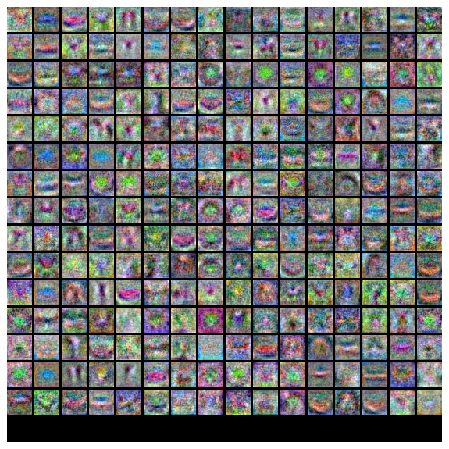

In [14]:
# Visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [78]:
# Print your test accuracy: this should be above 48%
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.383


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$

$\color{blue}{\textit Your Explanation:}$

